In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as pyplot
from IPython.display import Image

東京大学数理・データサイエンスコンソーシアム 社会人向け講座 2019年秋

# 解析・線形代数入門 〜データサイエンスのための〜

# 1-1 初等関数の微分

## 関数とは？

* 変数と変数の間の関係を表すもの
* $y=f(x)$ のように書く。$x$、$y$は変数
* $x$を入れると$y$という値が出力される「箱」(函数)
* $x$を独立変数(説明変数)、$y$を従属変数(被説明変数)と呼ぶが、必ずしも$x$が原因、$y$が結果とは限らない(c.f. 逆関数)

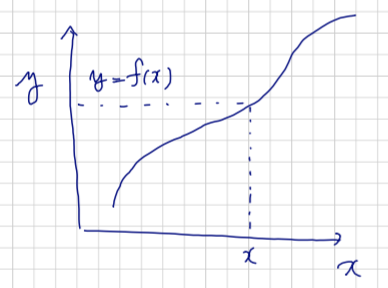

In [2]:
Image('fig-1-1-1.png')

* 例: 1次関数 $y = 2x + 1$、2次関数 $y = x^2$

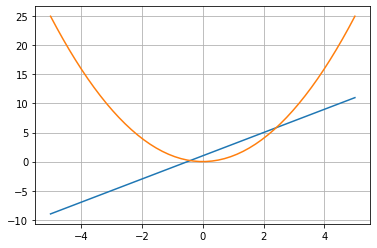

In [3]:
x = numpy.linspace(-5,5);
pyplot.plot(x, 2*x+1);
pyplot.plot(x, x**2);
pyplot.grid(which="major")

### 逆関数

* $y=f(x)$を$x=g(y)$の形に書き直したもの。$f$の逆関数であることが分かるように、$x=f^{-1}(y)$と書くことが多い
* グラフの形: 45度の線に関して引っくり返す
* 例
  * $y=2x+1$ の逆関数 → $x = (y-1)/2$
  * $y=x^2$ の逆関数 → $x=\pm \sqrt{y}$ (符号はどちらかを選ぶ)

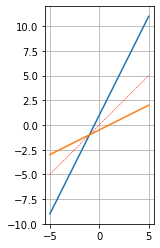

In [4]:
x = numpy.linspace(-5,5);
pyplot.plot(x, x, color='red', linewidth=0.5, linestyle='dashed'); # 斜め45度の線
pyplot.plot(x, 2*x+1); # y = 2x+1
pyplot.plot(x, (x-1)/2); # 逆関数
pyplot.gca().set_aspect('equal');
pyplot.grid(which="major")

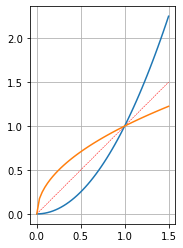

In [5]:
x = numpy.linspace(0,1.5);
pyplot.plot(x, x, color='red', linewidth=0.5, linestyle='dashed'); # 斜め45度の線
pyplot.plot(x, x**2);
pyplot.plot(x, numpy.sqrt(x));
pyplot.gca().set_aspect('equal');
pyplot.grid(which="major")

## 指数関数

* 年5%の複利で$n$年預けた場合: $(1.05)^n$
* 一般に $a$ を正の定数として$a^n$を考える
* $a^1 = a$、$a^0 = 1$
* $a^{(m+n)} = a^m \times a^n$
  * ここで、$m=1$, $n=-1$ とすると、$a^1 \times a^{-1} = a^0 = 1 \rightarrow a^{-1} = 1/a$、同様に$a^{-m} = 1/a^m$
* $a^{(mn)} = (a^m)^n$で$m=1/2$, $n=2$ とすると、$a^{\frac{1}{2} \times 2} = (a^{\frac{1}{2}})^2 =a \rightarrow a^{\frac{1}{2}} = \sqrt{a}$
  * $a^{1/n}$ は $n$ 乗したら $a$ になる数、$a$ の$n$乗根
* 一般の実数$x$についていくらでも近い$n/m$ ($n$, $m$は整数)を考えることができる: $a^{n/m} = (a^{1/m})^n$ $\rightarrow$ $a^x$ が定義できる
* $y= a^x$ を($a$を底とする)指数関数と呼ぶ
* 図: $0 < a < 1$, $a = 1$, $a>1$の場合

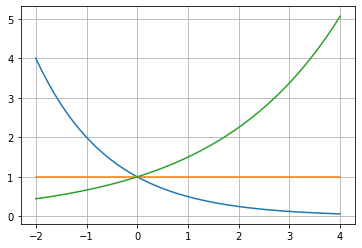

In [6]:
x = numpy.linspace(-2,4);
pyplot.plot(x, 0.5**x);
pyplot.plot(x, 1**x);
pyplot.plot(x, 1.5**x);
pyplot.grid(which="major")

### 指数関数の底
* 底が $e = 2.71828182846\cdots$ (ネイピア数)の場合 → 底が $e$ の指数関数 $e^x$ を $\exp x$ と書く <br>
* 底を $e$ にすると微分が便利 $\rightarrow$ 後で <br>
* 「底が $e$ の指数関数」を単に「指数関数」と呼ぶことが多い
* べき関数と指数関数の違い<br>
  * $x^2$ と $2^x$ のどちらが速く増える?

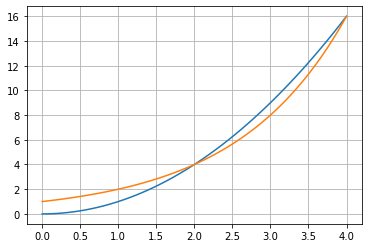

In [7]:
x = numpy.linspace(0,4);
pyplot.plot(x, x**2);
pyplot.plot(x, 2**x);
pyplot.grid(which="major")

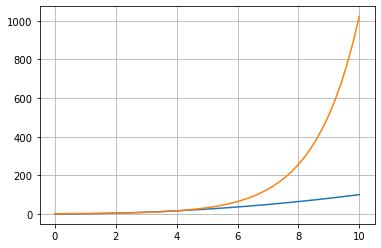

In [8]:
x = numpy.linspace(0,10);
pyplot.plot(x, x**2);
pyplot.plot(x, 2**x);
pyplot.grid(which="major")

## 関数の極限

* 変数$x$がある値$a$に近づくとき、それに伴って関数値$f(x)$がある値$\ell$に近づくとき「$x$が$a$に近づくときの関数$f(x)$の極限は$\ell$である」という
* あるいは、「関数$f(x)$は$\ell$に収束する」、「$x \rightarrow a$ のとき $f(x) \rightarrow \ell$」、「$\displaystyle \lim_{x \rightarrow a} f(x) = \ell$」などと書く
* 例1: $\displaystyle \lim_{x \rightarrow 2} x^2 = 4$
* 例2 $\displaystyle \lim_{x \rightarrow -2} (3x^2+x-1)/(x+5)^2 = 1$
* 例3:$\displaystyle \lim_{x \rightarrow 1} \frac{x^2-1}{x-1} = ?$ <br>
  * 分子分母に $x=1$ を代入すると $0/0$ となり値は不定になるように見える <br>
  * 少しづつ近づけてみる

In [9]:
def f(x):
    return (x**2 - 1) / (x-1);

print(f(2));
print(f(1.1));
print(f(1.01));
print(f(1.001));
print(f(1.0001));
print(f(1.00001));

3.0
2.1
2.009999999999999
2.0009999999999177
2.0000999999993923
2.0000100000008274


2にどんどん近づく。1より少しだけ小さい側から近づいても同様に2に近づく

In [10]:
print(f(0));
print(f(0.9));
print(f(0.99));
print(f(0.999));
print(f(0.9999));
print(f(0.99999));

1.0
1.9
1.990000000000001
1.9989999999999712
1.9998999999994975
1.9999899999991726


* ある$x=a$では関数の値が定義できないが、その上下から同じ値$\ell$に近づいていく場合もやはり、「$x$が$a$に近づくときの関数$f(x)$の極限は$\ell$である」という<br>
* 別の計算方法: $\displaystyle \lim_{x \rightarrow 1} \frac{x^2-1}{x-1} = \lim_{x \rightarrow 1} \frac{(x-1)(x+1)}{x-1} = \lim_{x \rightarrow 1} x+1 = 2$
* 例4: $\displaystyle \lim_{x \rightarrow 1+} \frac{1}{x-1} = \infty$。一方、$\displaystyle \lim_{x \rightarrow 1-} \frac{1}{x-1} = -\infty$ であるので、$\displaystyle \lim_{x \rightarrow 1} \frac{1}{x-1}$ は存在しない

## 微分係数と導関数

* $x$が$a$から$a+h$まで変わるときの$f(x)$の平均変化率: $\displaystyle \frac{f(a+h)-f(a)}{(a+h)-a} = \frac{f(a+h)-f(a)}{h}$

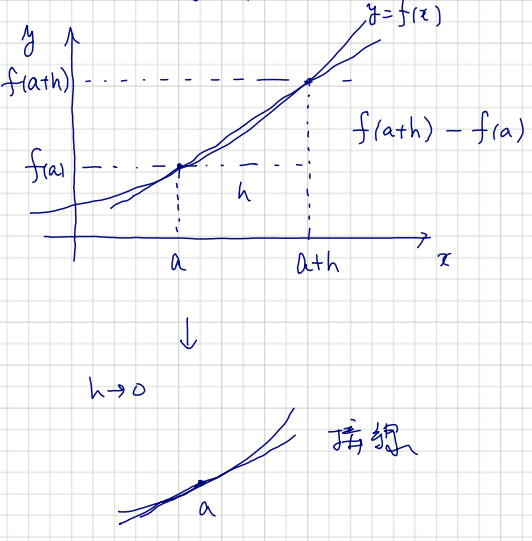

In [11]:
Image('fig-1-1-2.png')

* $h \rightarrow 0$ の極限を考えたものを「微分係数」と呼ぶ: $\displaystyle f'(a) = \lim_{h \rightarrow 0} \frac{f(a+h)-f(a)}{h}$
* $\displaystyle \frac{df}{dx} (a)$, $\displaystyle \frac{df}{dx} |_{x=a}$などとも書く

### 導関数

* 各点で微分可能であるとき、それぞれの$a$に対して一つの$f'(a)$が決まる。それらを全て集めると関数 $f'(x)$ が定義できる。「導関数」と呼ぶ
* 例1: $f(x)=x^2$の$x=a$における微分係数、$f(x)$の導関数
* 例2: $x^n$ の導関数
  
### 高階微分

* $f'(x)$ もやはり $x$ の関数なので、それの微分を考えることが可能。$n$回微分したものを$n$階導関数と呼び、$f^{(n)}(x)$と書く
* $\displaystyle f^{(n)} (x) = \frac{d^n f}{dx^n}(x) = \frac{d}{dx} f^{(n-1)}(x)$
* 例: $x^4$ の2階導関数、3階導関数

## 指数関数の微分

### $f(x) = a^x$の場合
  
* $\displaystyle f'(x) = (a^x)' = \lim_{h\rightarrow0} (a^{(x+h)}-a^x) / h = a^x \, \lim_{h\rightarrow0} (a^h - 1)/h = f(x) f'(0)$
* $\displaystyle \lim_{h\rightarrow0} (a^h - 1)/h$ は $x$ によらず、$a$のみに依存
* $\displaystyle \lim_{h\rightarrow0} (a^h - 1)/h=1$となるような$a$を選ぶと、$f'(x) = f(x)$となって便利
* そのような$a$を$e$と書く。ネイピア数と呼ぶ。$e=2.71828182846\cdots$ (無理数)
* $e^x$を$\exp x$とも書く。通常「指数関数」という場合は底が$e$のものを指す
* $a=e$の場合、高次の導関数も全て$e^x$

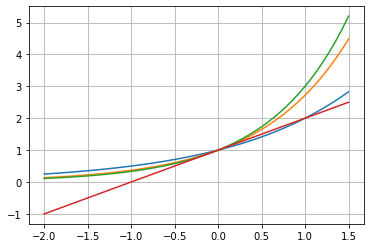

In [12]:
x = numpy.linspace(-2, 1.5);
pyplot.plot(x, 2**x);
pyplot.plot(x, numpy.exp(x));
pyplot.plot(x, 3**x);
pyplot.plot(x, x+1);
pyplot.grid(which='major');

## 関数の和、積、商、合成関数の微分

### 和の微分
  
  $(f(x) + g(x))' = f'(x) + g'(x)$
  
### 積の微分
  
  $f(x+\Delta x) = f(x) + \Delta f$, $g(x+\Delta x) = g(x) + \Delta f$ と置くと、$f'(x) = \lim_{\Delta x \rightarrow 0} \Delta f/\Delta x$, $g'(x) = \lim_{\Delta x \rightarrow 0} \Delta g/\Delta x$。このとき<br><br>
  \begin{align*}
    (f(x)g(x))' &= \lim_{\Delta x \rightarrow 0} (f(x+\Delta x) g(x+\Delta x) - f(x) g(x)) / \Delta x \\
    &= \lim_{\Delta x \rightarrow 0} \frac{(f(x) + \Delta f) (g(x) + \Delta g) - f(x) g(x)}{\Delta x} \\
    &= \lim_{\Delta x \rightarrow 0} \frac{\Delta f g(x) + f(x) \Delta g + \Delta f \Delta g}{\Delta x} \\
    &= \lim_{\Delta x \rightarrow 0} \Big[ \frac{\Delta f}{\Delta x} g(x) + f(x) \frac{\Delta g}{\Delta x} + \frac{\Delta f}{\Delta x} \frac{\Delta g}{\Delta x} \Delta x \Big] \\
    &= f'(x) g(x) + f(x) g'(x) + f'(x) g'(x) 0 \\
    &= f'(x) g(x) + f(x) g'(x)
  \end{align*}
    
### 商の微分
  
  $f(x)$, $g(x)$ は微分可能、$g(x)$は0でないとすると<br><br>
  \begin{align*}
    \Big(\frac{f(x)}{g(x)}\Big)'
    &=\lim_{\Delta x \rightarrow 0} \frac{\frac{f(x+\Delta x)}{g(x+\Delta x)} - \frac{f(x)}{g(x)}}{\Delta x} \\
    &=\lim_{\Delta x \rightarrow 0} \frac{\frac{f(x)+\Delta f}{g(x)+\Delta g} - \frac{f(x)}{g(x)}}{\Delta x} \\
    &=\lim_{\Delta x \rightarrow 0} \frac{(f(x)+\Delta f)g(x) - f(x)(g(x)+\Delta g)}{\Delta x (g(x) +  \Delta g) g(x)} \\
    &=\lim_{\Delta x \rightarrow 0} \frac{\Delta f g(x) - f(x) \Delta g}{\Delta x (g(x) +  \Delta g) g(x)} \\
    &=\lim_{\Delta x \rightarrow 0} \Big[ \frac{\Delta f}{\Delta x} g(x) - f(x) \frac{\Delta g}{\Delta x} \Big] \Big[ \frac{1}{(g(x) +  \Delta g) g(x)}\Big] \\
    &=\frac{f'(x) g(x) - f(x) g'(x)}{[g(x)]^2}
  \end{align*}

### 合成関数の微分

* $u(x)$, $y(u)$が与えられているとき$y(u(x))$は$x$の関数であり「合成関数」と呼ぶ

* 例: $u(x) = x^2+1$, $y(u) = u^3$ $\rightarrow$ $y=(x^2+1)^3$

* 合成関数の微分<br>
  $\displaystyle \frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}$
  
* 例: $y=(x^2+1)^3$の微分<br>
  $\displaystyle \frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx} = 3u^2 \times 2x = 6 x u^2 = 6 x (x^2+1)^2$

## グラフとの対応

### 関数の増減

* $f'(x) > 0$ ならば $x$ の近辺で増加
* $f'(x) < 0$ ならば $x$ の近辺で減少
* 例: $f(x) = -x^2 + x$, $f'(x) = -2x + 1$

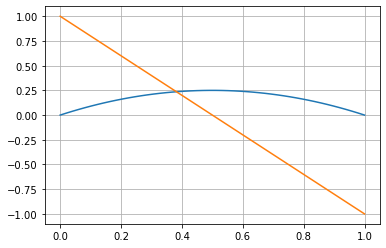

In [13]:
x = numpy.linspace(0, 1);
pyplot.plot(x, -x**2+ x);
pyplot.plot(x, -2*x + 1);
pyplot.grid(which="major")

### 接線の方程式

* $y=f(x)$の$x=a$における接線
* 点$(a,f(a))$を通り、傾き$f'(a)$の直線<br>
$y = f'(a) (x-a) + f(a)$
* あるいは少し変形して<br>
$f'(a) (x-a) - (y - f(a)) = 0$

### 直交する直線
* $(x_0,y_0)$、$(x_1, y_1)$の二点を通る直線の方程式<br>
$\displaystyle y = \frac{y_1-y_0}{x_1-x_0} (x-x_0) + y_0$<br>
($\displaystyle y = \frac{y_1-y_0}{x_1-x_0} (x-x_1) + y_1$と書いても同じ式)
* 左に90度回転すると$(x_0,y_0)$は$(-y_0,x_0)$、$(x_1,y_1)$は$(-y_1,x_1)$に移る。その二点を通る直線の方程式は<br>
$\displaystyle y = - \frac{x_1-x_0}{y_1-y_0} (x+y_0) + x_0$
* 傾き$a$の直線と、傾き$\displaystyle -\frac{1}{a}$の直線は直交する

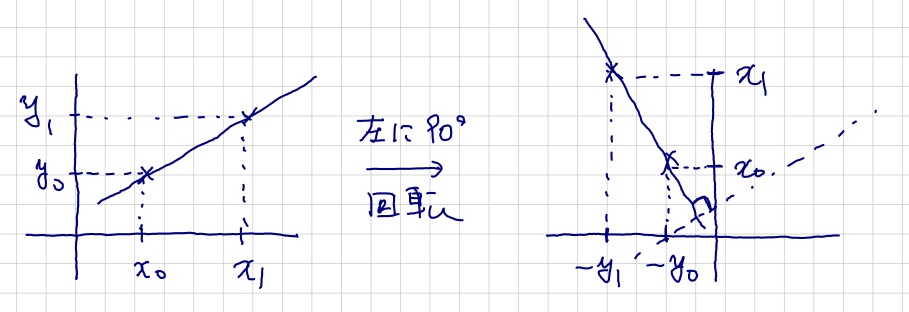

In [14]:
Image('fig-1-1-3.png')

### 法線
* 曲線上の点$P=(a, f(a))$でその点における接線に垂直な直線
* 接線の傾きは$f'(a)$、法線の傾きは$-\frac{1}{f'(a)}$
* 法線の方程式<br>
$\displaystyle y = -\frac{1}{f'(a)} (x-a) + f(a)$
* あるいは少し変形して<br>
$\displaystyle (x-a) + f'(a)(y-f(a)) = 0$

## 多項式近似とテイラー展開

* 点$P=(a,f(a))$における接線は曲線(関数)を直線で近似したもの
* 二次式、三次式$\cdots$で近似すると？
* 近似式$p(x) = a_0 + a_1 (x-a) + a_2 (x-a)^2 + \cdots$
* $x=a$ を代入すると $f(a) = a_0$
* $x$で一回微分した後で$x=a$を代入すると $f'(a) = a_1$
* $x$で二回微分した後で$x=a$を代入すると $f''(a) = 2 a_2 \rightarrow a_2 = f''(a) / 2$
* $n$回微分した後で$x=a$を代入すると$f^{(n)}(a) = n! \, a_n \rightarrow a_n = f^{(n)}(a) / n!$
* テイラー展開 (より正確には$x=a$のまわりでのテイラー展開)<br>
$\displaystyle f(x) = \sum_{n=0}^\infty \frac{f^{(n)}(a)}{n!} (x-a)^n = f(a) + f'(a) (x-a) + \frac{f''(a)}{2} (x-a)^2 + \frac{f'''(a)}{6} (x-a)^3 \cdots$
* 例: $\displaystyle f(x) = \frac{1}{1+x}$の$x=0$のまわりでの多項式近似
  * $f(x) = (1+x)^{-1}$, $f'(x) = -(1+x)^{-2}$, $f''(x)=2(1+x)^{-3}$ $\cdots$ $f^{(n)}(x)=(-1)^n n! \, (1+x)^{-(n+1)}$
  * 一次近似<br>
    $f(x) \simeq 1-x$
  * 二次近似<br>
    $f(x) \simeq 1-x + x^2$
  * 三次近似<br>
    $f(x) \simeq 1-x + x^2 - x^3$

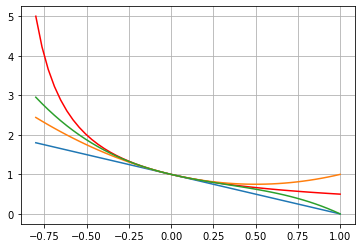

In [15]:
x = numpy.linspace(-0.8, 1);
pyplot.plot(x, 1/(1+x), color='red');
pyplot.plot(x, 1-x);
pyplot.plot(x, 1-x+x**2);
pyplot.plot(x, 1-x+x**2-x**3);
pyplot.grid(which='major');